In [1]:
# Created: 20250104

In [2]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [3]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


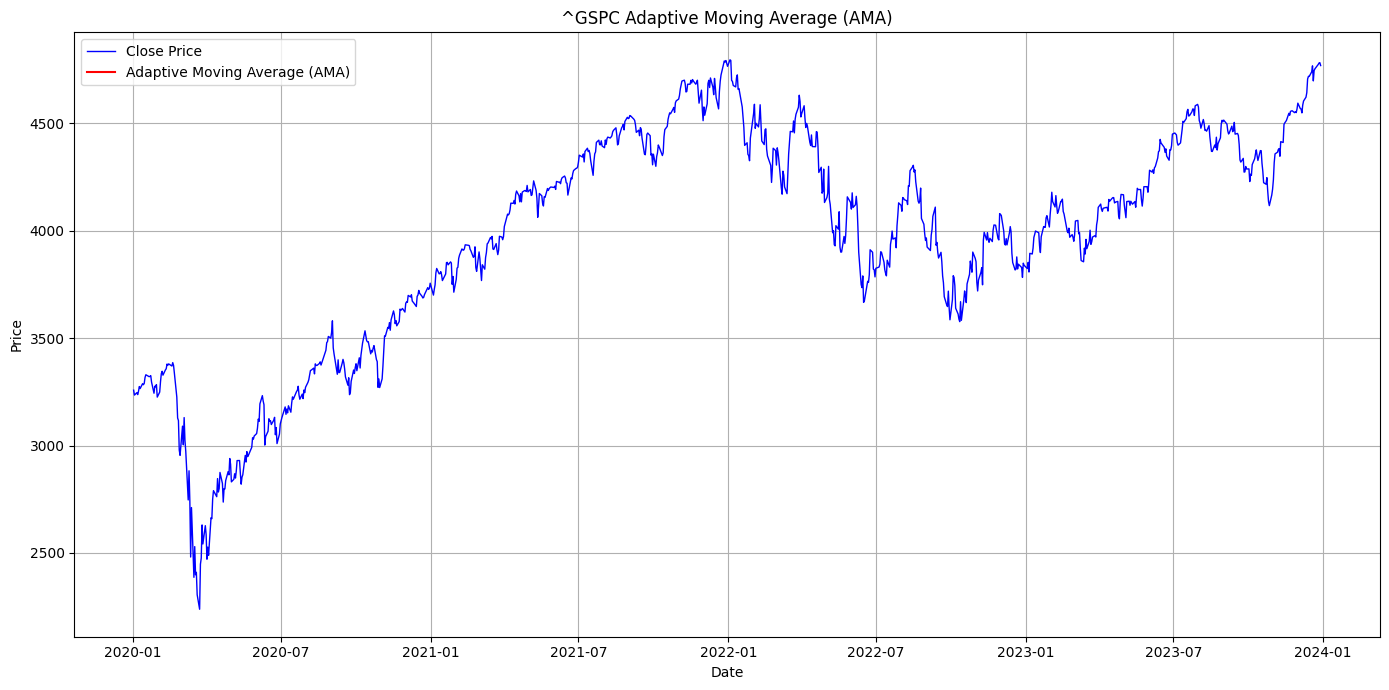

In [5]:

# Step 2: Calculate Adaptive Moving Average (AMA)
def calculate_ama(data, period=10, fast_period=2, slow_period=30):
    data['Price Change'] = data['Close'].diff(period)
    data['Volatility'] = data['Close'].diff().abs().rolling(window=period).sum()
    
    # Efficiency Ratio (ER)
    data['ER'] = data['Price Change'].abs() / data['Volatility']
    
    # Smoothing Constant (SC)
    fast_sc = 2 / (fast_period + 1)
    slow_sc = 2 / (slow_period + 1)
    data['SC'] = (data['ER'] * (fast_sc - slow_sc) + slow_sc) ** 2
    
    # Calculate AMA
    data['AMA'] = data['Close'].copy()  # Initialize AMA with Close
    for i in range(1, len(data)):
        data.loc[data.index[i], 'AMA'] = (
            data['AMA'].iloc[i - 1] +
            data['SC'].iloc[i] * (data['Close'].iloc[i] - data['AMA'].iloc[i - 1])
        )
    
    return data



In [6]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply AMA calculation
    data = calculate_ama(data)
    
    # Step 3: Plot Close Price and AMA
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price and AMA
    plt.plot(data['Close'], label='Close Price', color='blue', linewidth=1)
    plt.plot(data['AMA'], label='Adaptive Moving Average (AMA)', color='red', linewidth=1.5)
    
    # Customize the plot
    plt.title(f'{symbol} Adaptive Moving Average (AMA)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


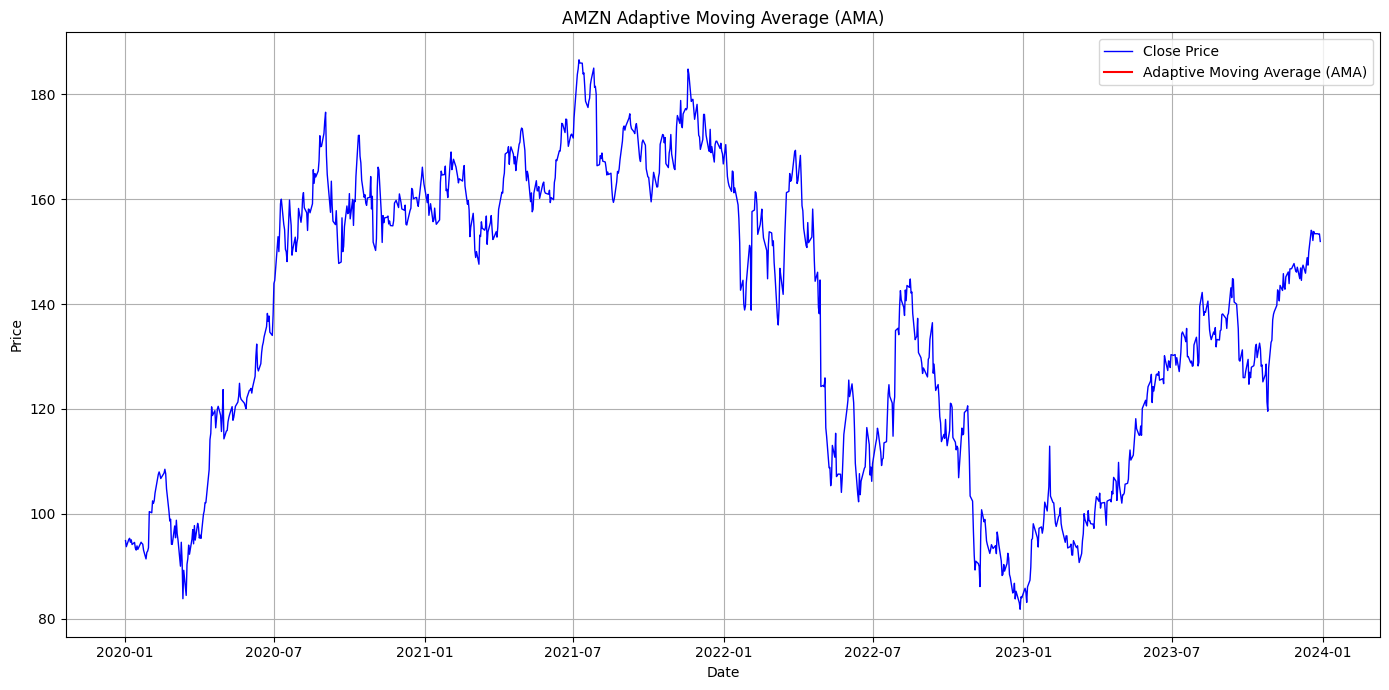

In [7]:
show_graph("AMZN")